In [1]:
import rosbags
import numpy as np
from matplotlib import pyplot as plt

radius: 6.666666666666667, v_linear: 2.0, v_angle: 0.3
sample_freq: 20.0, n: 1000, sample_time: 0.05


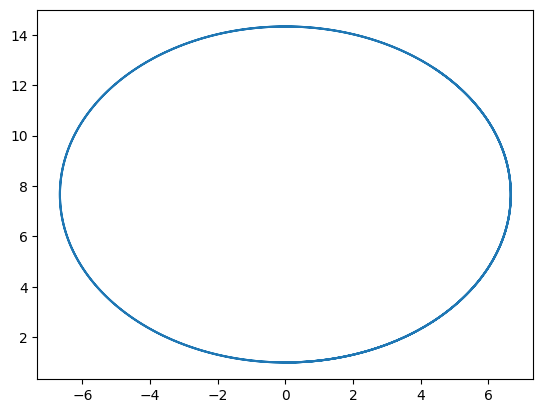

In [5]:
v_linear = 2.0
v_angle = 0.3
radius = v_linear / v_angle
y_offset = 1.0
sample_freq = 20.0
n = 1000
sample_time = 1.0 / sample_freq
theta = np.array([-0.5 * np.pi + v_angle * i * sample_time for i in range(n)])
x = radius * np.cos(theta)
y = radius * np.sin(theta) + radius + y_offset
yaw = theta + np.pi/2

plt.plot(x, y)
print(f"radius: {radius}, v_linear: {v_linear}, v_angle: {v_angle}\nsample_freq: {sample_freq}, n: {n}, sample_time: {sample_time}")

In [6]:
from rosbags.rosbag2 import Writer
from rosbags.typesys import Stores, get_typestore
from nav_msgs.msg import Odometry
import os
from time import time_ns as now

typestore = get_typestore(Stores.LATEST)
geometry_pose = typestore.types['nav_msgs/msg/Odometry']
bag_path = "/workspaces/mpc_ws/traj/circle"

# Create writer instance and open for writing.
with Writer(bag_path) as writer:
    # Add new connection.
    topic = '/target'
    msgtype = geometry_pose.__msgtype__
    connection = writer.add_connection(topic, msgtype, typestore=typestore)

    # Serialize and write message.
    stamp = now()
    for px, py, theta in zip(x, y, yaw):
        msg = Odometry()
        msg.header.stamp.sec = int(stamp // 1e9)
        msg.header.stamp.nanosec = int(stamp % 1e9)
        msg.header.frame_id = "odom"
        msg.child_frame_id = "base_link"
        msg.pose.pose.position.x = px
        msg.pose.pose.position.y = py
        msg.pose.pose.orientation.z = np.sin(theta/2)
        msg.pose.pose.orientation.w = np.cos(theta/2)
        msg.twist.twist.linear.x = v_linear
        msg.twist.twist.angular.z = v_angle
        writer.write(connection, stamp, typestore.serialize_cdr(msg, msgtype))
        stamp += sample_time * 1e9

/tmp/ipykernel_28024/1326357939.py:12: DeprecationWarning: Writer should be called with an explicit version number (8 or 9).
  with Writer(bag_path) as writer:
